In [118]:
import melodist
import pandas as pd
import numpy as np
import scipy.stats
import xarray as xr
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt
import cftime
import datetime as dt
from itertools import product
from cftime import Datetime360Day

def plot(obs, sim):
    plt.figure()
    ax = plt.gca()
    obs.loc[plot_period].plot(ax=ax, color='black', label='obs', lw=2)
    sim.loc[plot_period].plot(ax=ax)
    plt.legend()
    plt.show()

In [1]:
path_inp = (r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\merged\weather_variables.csv")
#south west england
latitude = 50.09
longitude = -5.67   
timezone = 1

calibration_period = slice('2042-01-01', '2042-12-31')
validation_period = slice('2046-01-01', '2046-12-31')
plot_period = slice('2042-09-03', '2042-09-05')

data_obs_daily = pd.read_csv(path_inp, index_col=0, parse_dates=[0])

NameError: name 'pd' is not defined

In [149]:
data_obs_daily.temperature += 273.15
data_obs_daily.tmin += 273.15
data_obs_daily.tmax += 273.15

data_obs_daily = data_obs_daily.rename(columns={ "temperature":"temp" })

print(data_obs_daily)

                 wind       hum   hum_min   hum_max        tmax        tmin  \
dates                                                                         
2042-01-01   3.764097  0.005724  0.005123  0.006271  284.755377  281.303725   
2042-01-02   4.697969  0.006654  0.006209  0.006914  285.114275  281.276691   
2042-01-03   2.709588  0.004827  0.004302  0.005946  283.523654  280.263896   
2042-01-04   8.707356  0.006385  0.005537  0.006874  285.792243  281.928951   
2042-01-05  10.376186  0.005280  0.004699  0.005555  284.411233  282.362641   
...               ...       ...       ...       ...         ...         ...   
2047-12-27   8.725033  0.005813  0.004159  0.007879  283.389804  281.154946   
2047-12-28   9.434083  0.006943  0.004659  0.009198  284.919814  281.795374   
2047-12-29   3.674617  0.008279  0.006857  0.008736  285.948354  284.036629   
2047-12-30   4.635131  0.007847  0.006915  0.008227  285.223930  283.728500   
2047-12-31   8.887768  0.006476  0.005845  0.007033 

c:\anaconda\lib\site-packages\melodist\station.py:87: FutureWarning: Index.is_all_dates is deprecated, will be removed in a future version. check index.inferred_type instead.
  assert df.index.is_all_dates


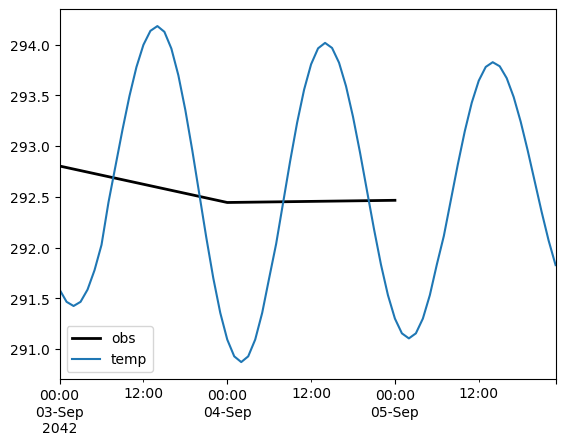

In [150]:
station = melodist.Station(lon=longitude, lat=latitude,timezone=timezone,data_daily=data_obs_daily)

tempdf = pd.DataFrame()
#for method in ('sine_min_max', 'sine_mean', 'mean_course_min_max', 'mean_course_mean'):
station.disaggregate_temperature()
tempdf = station.data_disagg.temp

plot(data_obs_daily.temp, tempdf)
# print_stats(data_obs_daily.temp, tempdf)

In [9]:
tempd = tempdf[0:500]

<AxesSubplot: >

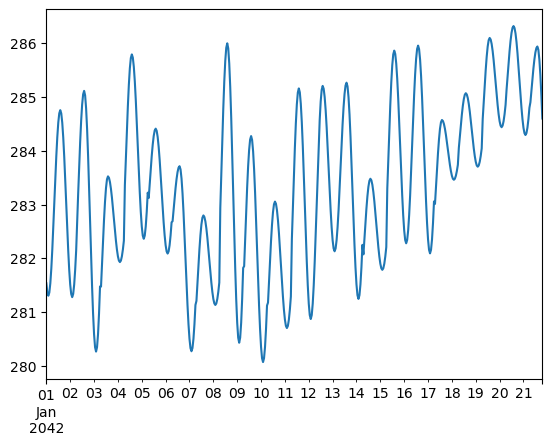

In [10]:
tempd.plot()

In [99]:
te = tempdf.groupby(pd.Grouper(freq='d')).mean()

In [101]:
te.to_csv (r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\temdf.csv")

<AxesSubplot: >

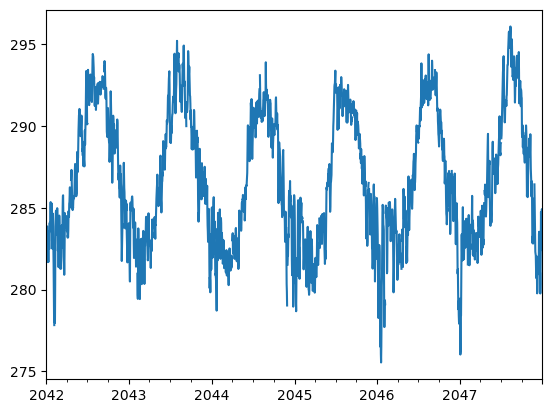

In [17]:
te.plot()

In [151]:
data_obs_daily = melodist.util.distribute_equally(data_obs_daily)

In [152]:
data_obs_daily["precip"]

2042-01-01 00:00:00    0.100894
2042-01-01 01:00:00    0.100894
2042-01-01 02:00:00    0.100894
2042-01-01 03:00:00    0.100894
2042-01-01 04:00:00    0.100894
                         ...   
2047-12-31 19:00:00    0.121810
2047-12-31 20:00:00    0.121810
2047-12-31 21:00:00    0.121810
2047-12-31 22:00:00    0.121810
2047-12-31 23:00:00    0.121810
Freq: H, Name: precip, Length: 52584, dtype: float64

In [160]:
g = data_obs_daily["precip"].groupby(pd.Grouper(freq='m')).mean()

<AxesSubplot: >

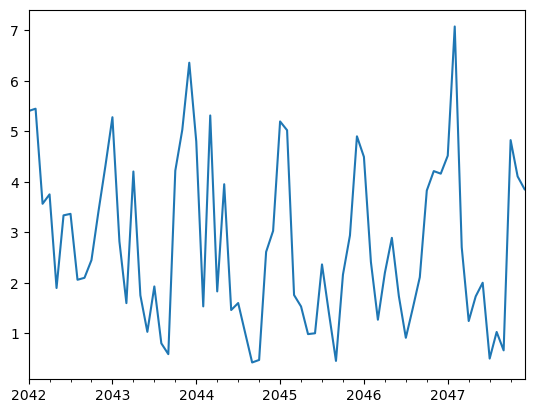

In [161]:
g.plot()

In [162]:
g = data_obs_daily["precip"].groupby(pd.Grouper(freq='d')).mean()

In [163]:
g

2042-01-01     0.100894
2042-01-02     4.855429
2042-01-03     3.342196
2042-01-04     6.384910
2042-01-05     1.923238
                ...    
2047-12-27     8.367735
2047-12-28    15.691691
2047-12-29     1.683566
2047-12-30     0.852746
2047-12-31     0.121810
Freq: D, Name: precip, Length: 2191, dtype: float64

In [164]:
g.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\precipdf.csv")

c:\anaconda\lib\site-packages\melodist\stationstatistics.py:72: FutureWarning: Index.is_all_dates is deprecated, will be removed in a future version. check index.inferred_type instead.
  assert df.index.is_all_dates
c:\anaconda\lib\site-packages\melodist\util\util.py:388: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = df.reset_index().pivot('level_1', 'level_0')


TypeError: title() missing 1 required positional argument: 'label'

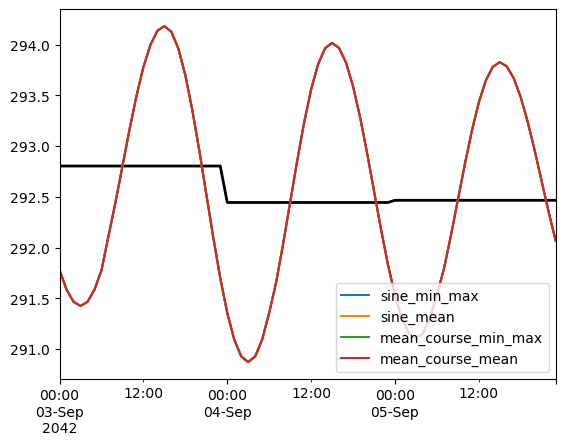

In [170]:
station.statistics = melodist.StationStatistics(data_obs_daily.loc[calibration_period])

stats = station.statistics
stats.calc_temperature_stats()
tempdf = pd.DataFrame()
for method in ('sine_min_max', 'sine_mean', 'mean_course_min_max', 'mean_course_mean'):
    station.disaggregate_temperature(method="sine_min_max", min_max_time='sun_loc_shift')
    tempdf[method] = station.data_disagg.temp

plot(data_obs_daily.temp, tempdf)


c:\anaconda\lib\site-packages\melodist\stationstatistics.py:72: FutureWarning: Index.is_all_dates is deprecated, will be removed in a future version. check index.inferred_type instead.
  assert df.index.is_all_dates
c:\anaconda\lib\site-packages\melodist\util\util.py:388: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = df.reset_index().pivot('level_1', 'level_0')


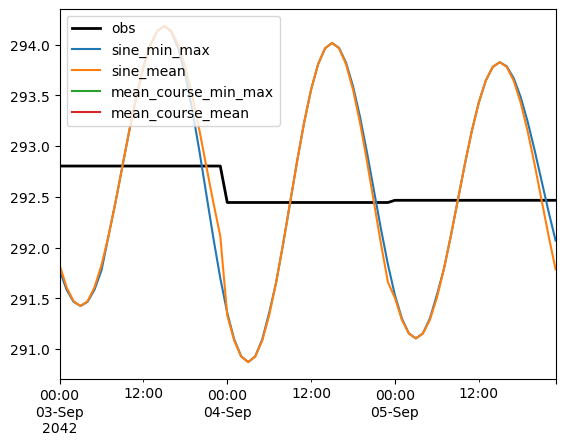

In [16]:
station.statistics = melodist.StationStatistics(data_obs_daily.loc[calibration_period])
stats = station.statistics
stats.calc_temperature_stats()
tempdf = pd.DataFrame()
for method in ('sine_min_max', 'sine_mean', 'mean_course_min_max', 'mean_course_mean'):
    station.disaggregate_temperature(method=method, min_max_time='sun_loc_shift')
    tempdf[method] = station.data_disagg.temp

plot(data_obs_daily.temp, tempdf)

In [19]:
tempdf[0:24]

,sine_min_max,sine_mean,mean_course_min_max,mean_course_mean
2042-01-01 00:00:00,281.809208,281.809208,NaN,NaN
2042-01-01 01:00:00,281.534942,281.534942,NaN,NaN
2042-01-01 02:00:00,281.362531,281.362531,NaN,NaN
2042-01-01 03:00:00,281.303725,281.303725,NaN,NaN
2042-01-01 04:00:00,281.362531,281.362531,NaN,NaN
2042-01-01 05:00:00,281.534942,281.534942,NaN,NaN
2042-01-01 06:00:00,281.809208,281.809208,NaN,NaN
2042-01-01 07:00:00,282.166638,282.166638,NaN,NaN
2042-01-01 08:00:00,282.582874,282.582874,NaN,NaN
2042-01-01 09:00:00,283.029551,283.029551,NaN,NaN


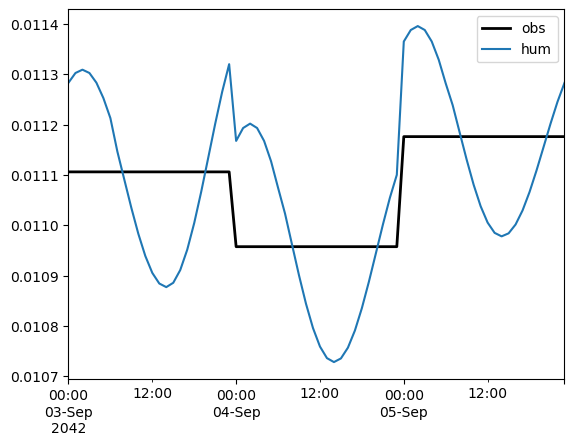

In [142]:
# station = melodist.Station(lon=longitude, lat=latitude,timezone=timezone,data_daily=data_obs_daily)
station.disaggregate_temperature()

humdf = pd.DataFrame()
#for method in ('sine_min_max', 'sine_mean', 'mean_course_min_max', 'mean_course_mean'):
station.disaggregate_humidity(method = 'dewpoint_regression',preserve_daily_mean=True)
humdf = station.data_disagg.hum

plot(data_obs_daily.hum, humdf)

In [9]:
station.statistics = melodist.StationStatistics(data_obs_daily.loc[calibration_period])
stats = station.statistics
stats.calc_humidity_stats()

c:\anaconda\lib\site-packages\melodist\stationstatistics.py:72: FutureWarning: Index.is_all_dates is deprecated, will be removed in a future version. check index.inferred_type instead.
  assert df.index.is_all_dates
c:\anaconda\lib\site-packages\melodist\humidity.py:117: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df = pd.DataFrame(data=dict(tmin=tmin, tdew=tdew)).dropna(how='any')


In [36]:
data_obs_daily

,wind,hum,tmax,tmin,temp,glob,precip,hum_min,hum_max
2042-01-01 00:00:00,3.764097,0.005724,284.755377,281.303725,283.029551,95.670688,0.100894,0.005724,0.005724
2042-01-01 01:00:00,3.764097,0.005724,284.755377,281.303725,283.029551,95.670688,0.100894,0.005724,0.005724
2042-01-01 02:00:00,3.764097,0.005724,284.755377,281.303725,283.029551,95.670688,0.100894,0.005724,0.005724
2042-01-01 03:00:00,3.764097,0.005724,284.755377,281.303725,283.029551,95.670688,0.100894,0.005724,0.005724
2042-01-01 04:00:00,3.764097,0.005724,284.755377,281.303725,283.029551,95.670688,0.100894,0.005724,0.005724
...,...,...,...,...,...,...,...,...,...
2047-12-31 19:00:00,8.887768,0.006476,284.683962,282.763106,283.723534,114.647908,0.121810,0.006476,0.006476
2047-12-31 20:00:00,8.887768,0.006476,284.683962,282.763106,283.723534,114.647908,0.121810,0.006476,0.006476
2047-12-31 21:00:00,8.887768,0.006476,284.683962,282.763106,283.723534,114.647908,0.121810,0.006476,0.006476
2047-12-31 22:00:00,8.887768,0.006476,284.683962,282.763106,283.723534,114.647908,0.121810,0.006476,0.006476


In [71]:
data_obs_daily.hum[0:24]

2042-01-01 00:00:00    0.005724
2042-01-01 01:00:00    0.005724
2042-01-01 02:00:00    0.005724
2042-01-01 03:00:00    0.005724
2042-01-01 04:00:00    0.005724
2042-01-01 05:00:00    0.005724
2042-01-01 06:00:00    0.005724
2042-01-01 07:00:00    0.005724
2042-01-01 08:00:00    0.005724
2042-01-01 09:00:00    0.005724
2042-01-01 10:00:00    0.005724
2042-01-01 11:00:00    0.005724
2042-01-01 12:00:00    0.005724
2042-01-01 13:00:00    0.005724
2042-01-01 14:00:00    0.005724
2042-01-01 15:00:00    0.005724
2042-01-01 16:00:00    0.005724
2042-01-01 17:00:00    0.005724
2042-01-01 18:00:00    0.005724
2042-01-01 19:00:00    0.005724
2042-01-01 20:00:00    0.005724
2042-01-01 21:00:00    0.005724
2042-01-01 22:00:00    0.005724
2042-01-01 23:00:00    0.005724
Freq: H, Name: hum, dtype: float64

c:\anaconda\lib\site-packages\melodist\stationstatistics.py:72: FutureWarning: Index.is_all_dates is deprecated, will be removed in a future version. check index.inferred_type instead.
  assert df.index.is_all_dates
c:\anaconda\lib\site-packages\melodist\humidity.py:117: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df = pd.DataFrame(data=dict(tmin=tmin, tdew=tdew)).dropna(how='any')


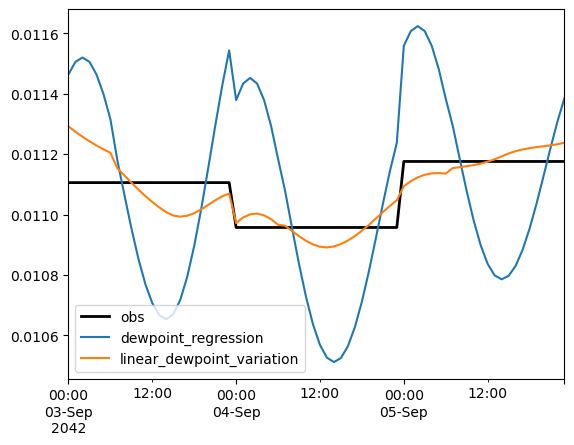

In [105]:
#  ``equal``
#                 Mean daily humidity is duplicated for the 24 hours of the day. (Default)

#             ``minimal``:
#                 Calculates humidity from daily dew point temperature by setting the dew point temperature
#                 equal to the daily minimum temperature.

#             ``dewpoint_regression``:
#                 Calculates humidity from daily dew point temperature by calculating dew point temperature
#                 using ``Tdew = a * Tmin + b``, where ``a`` and ``b`` are determined by calibration.

#             ``linear_dewpoint_variation``:
#                 Calculates humidity from hourly dew point temperature by assuming a linear dew point
#                 temperature variation between consecutive days.

#             ``min_max``:
#                 Calculates hourly humidity from observations of daily minimum and maximum humidity.

#             ``month_hour_precip_mean``:
#                 Calculates hourly humidity from categorical [month, hour, precip(y/n)] mean values
#                 derived from observations.

# station.statistics = melodist.StationStatistics(data_obs_daily.loc[calibration_period])
# stats = station.statistics
# stats.calc_humidity_stats()

# station.disaggregate_temperature(method='sine_min_max', min_max_time='fix')
# humdf = pd.DataFrame()
# for method in ( 'dewpoint_regression',
#                'linear_dewpoint_variation' ):
#     station.disaggregate_humidity(method=method,preserve_daily_mean=True)
#     humdf[method] = station.data_disagg.hum

# plot(data_obs_daily.hum, humdf)

c:\anaconda\lib\site-packages\melodist\stationstatistics.py:72: FutureWarning: Index.is_all_dates is deprecated, will be removed in a future version. check index.inferred_type instead.
  assert df.index.is_all_dates
c:\anaconda\lib\site-packages\melodist\humidity.py:117: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df = pd.DataFrame(data=dict(tmin=tmin, tdew=tdew)).dropna(how='any')


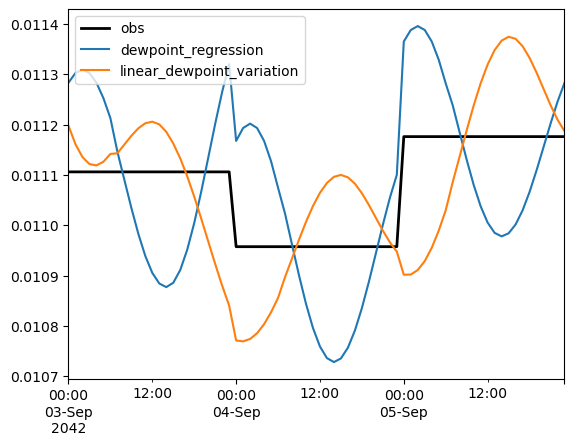

In [137]:

station.statistics = melodist.StationStatistics(data_obs_daily.loc[calibration_period])
stats = station.statistics
stats.calc_humidity_stats()

station.disaggregate_temperature(method='sine_min_max', min_max_time='fix')
humdf = pd.DataFrame()
for method in ( 'dewpoint_regression',
               'linear_dewpoint_variation' ):
    station.disaggregate_humidity(method=method,preserve_daily_mean=True)
    humdf[method] = station.data_disagg.hum

plot(data_obs_daily.hum, humdf)

In [138]:
h = humdf.groupby(pd.Grouper(freq='d')).mean()

In [139]:
h

,dewpoint_regression,linear_dewpoint_variation
2042-01-01,0.005724,0.005724
2042-01-02,0.006654,0.006654
2042-01-03,0.004827,0.004827
2042-01-04,0.006385,0.006385
2042-01-05,0.005280,0.005280
...,...,...
2047-12-27,0.005813,0.005813
2047-12-28,0.006943,0.006943
2047-12-29,0.008279,0.008279
2047-12-30,0.007847,0.007847


In [140]:
h.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\humdf.csv")

In [141]:
humdf

,dewpoint_regression,linear_dewpoint_variation
2042-01-01 00:00:00,0.005835,0.005663
2042-01-01 01:00:00,0.005848,0.005654
2042-01-01 02:00:00,0.005852,0.005651
2042-01-01 03:00:00,0.005848,0.005653
2042-01-01 04:00:00,0.005835,0.005660
...,...,...
2047-12-31 19:00:00,0.006456,0.006516
2047-12-31 20:00:00,0.006477,0.006476
2047-12-31 21:00:00,0.006498,0.006437
2047-12-31 22:00:00,0.006518,0.006401


In [48]:
humdf[0:24]

,equal,minimal,dewpoint_regression,linear_dewpoint_variation,min_max
2042-01-01 00:00:00,0.005724,9.072097,0.005957,0.005786,0.005724
2042-01-01 01:00:00,0.005724,10.229084,0.005987,0.005793,0.005724
2042-01-01 02:00:00,0.005724,10.627180,0.005997,0.005795,0.005724
2042-01-01 03:00:00,0.005724,10.229084,0.005987,0.005792,0.005724
2042-01-01 04:00:00,0.005724,9.072097,0.005957,0.005785,0.005724
2042-01-01 05:00:00,0.005724,7.262413,0.005911,0.005773,0.005724
2042-01-01 06:00:00,0.005724,4.959536,0.005851,0.005758,0.005724
2042-01-01 07:00:00,0.005724,2.354746,0.005784,0.005741,0.005724
2042-01-01 08:00:00,0.005724,0.000000,0.005714,0.005723,0.005724
2042-01-01 09:00:00,0.005724,0.000000,0.005647,0.005705,0.005724


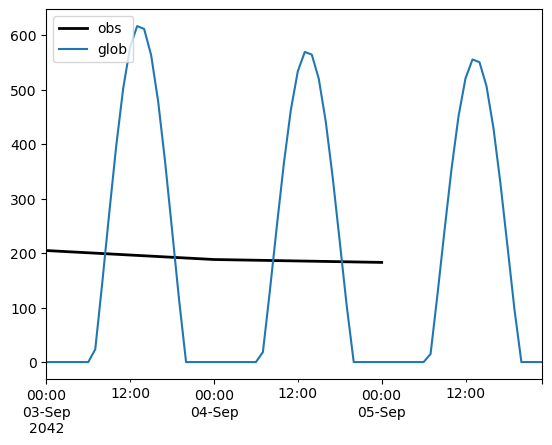

In [123]:
globdf = pd.DataFrame()
station.disaggregate_radiation()
globdf = station.data_disagg.glob

plot(data_obs_daily.glob, globdf)

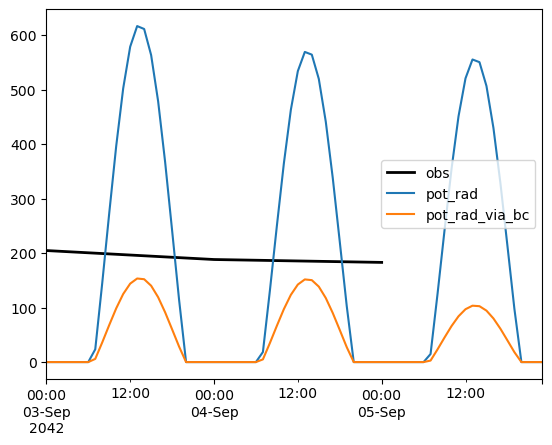

In [124]:
globdf = pd.DataFrame()
for method in ('pot_rad',
               # 'pot_rad_via_ssd',  # not possible here as we do not have sunshine duration data
               'pot_rad_via_bc',
               ):
    station.disaggregate_radiation(method=method, pot_rad=None)
    globdf[method] = station.data_disagg.glob

plot(data_obs_daily.glob, globdf)

In [125]:
g = globdf.groupby(pd.Grouper(freq='d')).mean()

In [126]:
g

,pot_rad,pot_rad_via_bc
2042-01-01,34.967128,16.030780
2042-01-02,27.920758,23.906740
2042-01-03,33.712579,7.846458
2042-01-04,15.033335,18.012965
2042-01-05,28.834932,6.336576
...,...,...
2047-12-27,19.226774,4.530618
2047-12-28,10.082895,5.040002
2047-12-29,21.345458,5.420240
2047-12-30,20.041273,4.941206


In [127]:
g.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\globdf.csv")

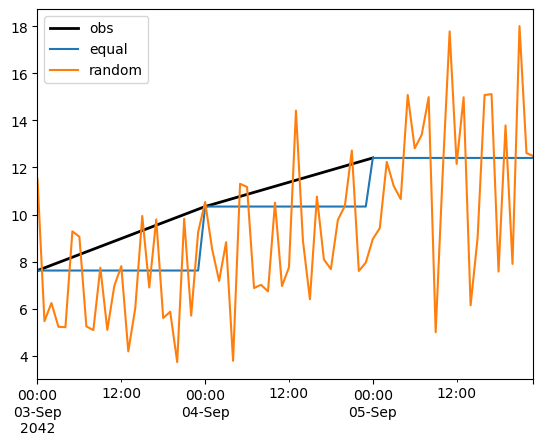

In [128]:
winddf = pd.DataFrame()
for method in ('equal',  'random'):
    station.disaggregate_wind(method = method)
    winddf[method] = station.data_disagg.wind

plot(data_obs_daily.wind, winddf)


In [129]:
w = winddf.groupby(pd.Grouper(freq='d')).mean()

In [130]:
w

,equal,random
2042-01-01,3.764097,3.373326
2042-01-02,4.697969,4.665729
2042-01-03,2.709588,2.636460
2042-01-04,8.707356,8.084751
2042-01-05,10.376186,8.749490
...,...,...
2047-12-27,8.725033,7.950748
2047-12-28,9.434083,9.327549
2047-12-29,3.674617,3.526826
2047-12-30,4.635131,3.835049


In [131]:
w.to_csv(r"C:\Users\Deepika Chandrababu\Desktop\uk_dataset\csv\winddf.csv")

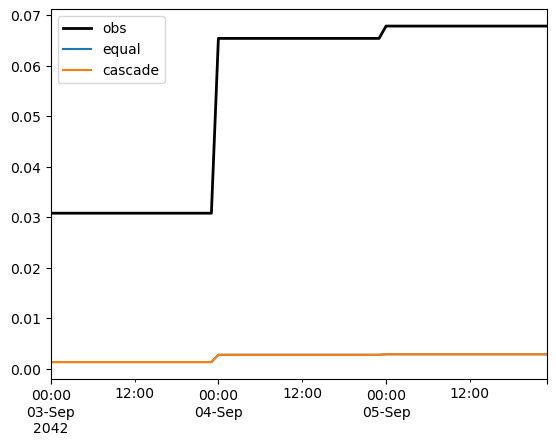

In [155]:
precipdf = pd.DataFrame()
for method in ('equal', 'cascade'):
    station.disaggregate_precipitation(method='equal')
    precipdf[method] = station.data_disagg.precip
    
plot(data_obs_daily.precip, precipdf)

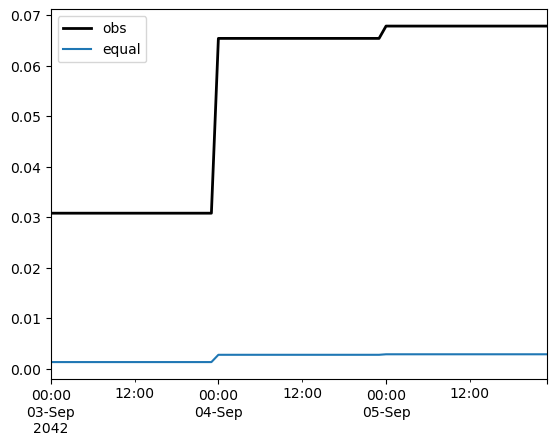

In [157]:
precipdf = pd.DataFrame()
for method in ('equal',):
    station.disaggregate_precipitation(method=method)
    precipdf[method] = station.data_disagg.precip
    
plot(data_obs_daily.precip, precipdf)

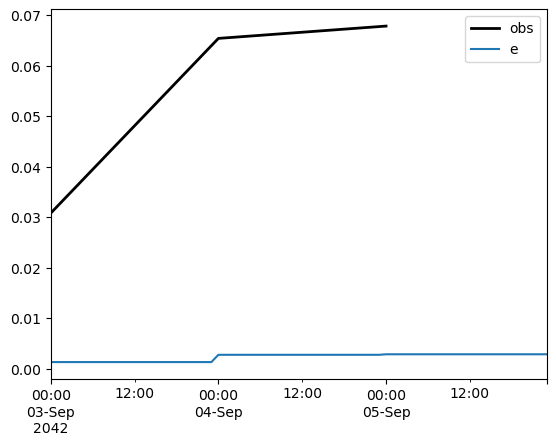

In [134]:
precipdf = pd.DataFrame()
# for method in ('equal'):
station.disaggregate_precipitation()
precipdf[method] = station.data_disagg.precip
    
plot(data_obs_daily.precip, precipdf)

## Use direct values for precipitation and shortwave